In [4]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# 讀取圖檔
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

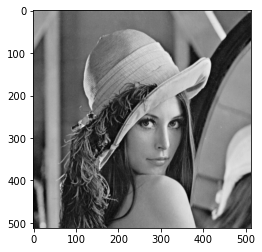

In [6]:
plt.imshow(img.astype('uint8'), cmap ='gray')
plt.show()

In [9]:
def Roberts_operator(ori_img, threshold = 30):
    #change datatype, otherwise overflow may occur
    float_img = ori_img.astype(float)
    s = ori_img.shape
    ro_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = c
            y0 = r
            x1 = min(c + 1, s[0] - 1)
            y1 = min(r + 1, s[1] - 1)
            r1 = -float_img[x0,y0] + float_img[x1,y1]
            r2 = -float_img[x1,y0] + float_img[x0,y1]
            grad_mag =  int(np.sqrt(r1 ** 2 + r2 ** 2))
            if grad_mag >= threshold:
                ro_result[c,r] = 0
            else:
                ro_result[c,r] = 255
    return ro_result
    

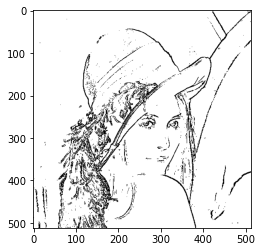

In [10]:
ro = Roberts_operator(img, 30)
plt.imshow(ro.astype("uint8"), cmap ='gray')
plt.show()

In [13]:
def Prewitt_operator(ori_img, threshold = 24):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            p1 = -float_img[x0,y0]-float_img[x1,y0]-float_img[x2,y0]+\
                 +float_img[x0,y2]+float_img[x1,y2]+float_img[x2,y2]
            p2 = -float_img[x0,y0]-float_img[x0,y1]-float_img[x0,y2]+\
                 +float_img[x2,y0]+float_img[x2,y1]+float_img[x2,y2]
            grad_mag =  int(np.sqrt(p1 ** 2 + p2 ** 2))
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result

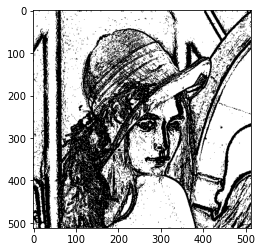

In [15]:
po = Prewitt_operator(img, 24)
plt.imshow(po.astype("uint8"), cmap ='gray')
plt.show()

In [16]:
def Sobel_operator(ori_img, threshold = 38):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            p1 = -float_img[x0,y0]-2*float_img[x1,y0]-float_img[x2,y0]+\
                 +float_img[x0,y2]+2*float_img[x1,y2]+float_img[x2,y2]
            p2 = -float_img[x0,y0]-2*float_img[x0,y1]-float_img[x0,y2]+\
                 +float_img[x2,y0]+2*float_img[x2,y1]+float_img[x2,y2]
            grad_mag =  int(np.sqrt(p1 ** 2 + p2 ** 2))
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result

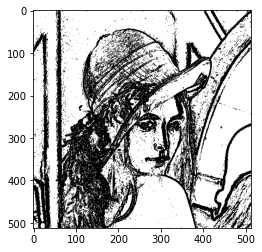

In [17]:
so = Sobel_operator(img, 38)
plt.imshow(so.astype("uint8"), cmap ='gray')
plt.show()

In [21]:
def FreiChen_operator(ori_img, threshold = 30):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            p1 = -float_img[x0,y0]-np.sqrt(float_img[x1,y0])-float_img[x2,y0]+\
                 +float_img[x0,y2]+np.sqrt(float_img[x1,y2])+float_img[x2,y2]
            p2 = -float_img[x0,y0]-np.sqrt(float_img[x0,y1])-float_img[x0,y2]+\
                 +float_img[x2,y0]+np.sqrt(float_img[x2,y1])+float_img[x2,y2]
            grad_mag =  int(np.sqrt(p1 ** 2 + p2 ** 2))
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result

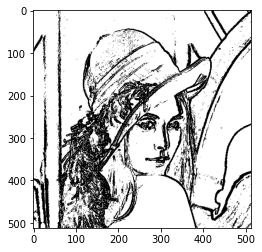

In [22]:
fc = FreiChen_operator(img, 30)
plt.imshow(fc.astype("uint8"), cmap ='gray')
plt.show()

In [23]:
def Kirsch_Compass_Operator(ori_img, threshold = 135):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            k = np.zeros(8)
            k[0] = -3*float_img[x0,y0]-3*float_img[x1,y0]+5*float_img[x2,y0]\
                   -3*float_img[x0,y1]+5*float_img[x2,y1]\
                   -3*float_img[x0,y2]-3*float_img[x1,y2]+5*float_img[x0,y2]
            k[1] = -3*float_img[x0,y0]+5*float_img[x1,y0]+5*float_img[x2,y0]\
                   -3*float_img[x0,y1]+5*float_img[x2,y1]\
                   -3*float_img[x0,y2]-3*float_img[x1,y2]-3*float_img[x0,y2]
            k[2] = 5*float_img[x0,y0]+5*float_img[x1,y0]+5*float_img[x2,y0]\
                   -3*float_img[x0,y1]-3*float_img[x2,y1]\
                   -3*float_img[x0,y2]-3*float_img[x1,y2]-3*float_img[x0,y2]
            k[3] = 5*float_img[x0,y0]+5*float_img[x1,y0]-3*float_img[x2,y0]\
                   +5*float_img[x0,y1]-3*float_img[x2,y1]\
                   -3*float_img[x0,y2]-3*float_img[x1,y2]-3*float_img[x0,y2]
            k[4] = 5*float_img[x0,y0]-3*float_img[x1,y0]-3*float_img[x2,y0]\
                   +5*float_img[x0,y1]-3*float_img[x2,y1]\
                   +5*float_img[x0,y2]-3*float_img[x1,y2]-3*float_img[x0,y2]
            k[5] = -3*float_img[x0,y0]-3*float_img[x1,y0]-3*float_img[x2,y0]\
                   +5*float_img[x0,y1]-3*float_img[x2,y1]\
                   +5*float_img[x0,y2]+5*float_img[x1,y2]-3*float_img[x0,y2]
            k[6] = -3*float_img[x0,y0]-3*float_img[x1,y0]-3*float_img[x2,y0]\
                   -3*float_img[x0,y1]-3*float_img[x2,y1]\
                   +5*float_img[x0,y2]+5*float_img[x1,y2]+5*float_img[x0,y2]
            k[7] = -3*float_img[x0,y0]-3*float_img[x1,y0]-3*float_img[x2,y0]\
                   -3*float_img[x0,y1]+5*float_img[x2,y1]\
                   -3*float_img[x0,y2]+5*float_img[x1,y2]+5*float_img[x0,y2]
            grad_mag = max(k)
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result
    

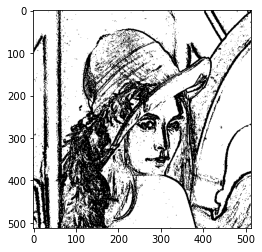

In [25]:
kc = Kirsch_Compass_Operator(img, 135)
plt.imshow(kc.astype("uint8"), cmap ='gray')
plt.show()

In [26]:
def Robinson_Operator(ori_img, threshold = 43):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            k = np.zeros(8)
            k[0] = -1*float_img[x0,y0]-2*float_img[x0,y1]-1*float_img[x0,y2]\
                   +1*float_img[x2,y0]+2*float_img[x2,y1]+1*float_img[x2,y2]
            k[1] = -1*float_img[x0,y1]-2*float_img[x0,y2]-1*float_img[x1,y2]\
                   +1*float_img[x1,y0]+2*float_img[x2,y0]+1*float_img[x2,y1]
            k[2] = -1*float_img[x0,y2]-2*float_img[x1,y2]-1*float_img[x2,y2]\
                   +1*float_img[x0,y0]+2*float_img[x1,y0]+1*float_img[x2,y0]
            k[3] = -1*float_img[x1,y2]-2*float_img[x2,y2]-1*float_img[x2,y1]\
                   +1*float_img[x0,y1]+2*float_img[x0,y0]+1*float_img[x1,y0]
            k[4] = -1*float_img[x2,y0]-2*float_img[x2,y1]-1*float_img[x2,y2]\
                   +1*float_img[x0,y0]+2*float_img[x0,y1]+1*float_img[x0,y2]
            k[5] = -1*float_img[x1,y0]-2*float_img[x2,y0]-1*float_img[x2,y1]\
                   +1*float_img[x0,y1]+2*float_img[x0,y2]+1*float_img[x1,y2]
            k[6] = -1*float_img[x0,y0]-2*float_img[x1,y0]-1*float_img[x2,y0]\
                   +1*float_img[x0,y2]+2*float_img[x1,y2]+1*float_img[x2,y2]
            k[7] = -1*float_img[x0,y1]-2*float_img[x0,y0]-1*float_img[x1,y0]\
                   +1*float_img[x1,y2]+2*float_img[x2,y2]+1*float_img[x2,y1]
            grad_mag = max(k)
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result
    

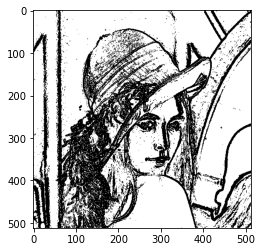

In [27]:
ro = Robinson_Operator(img, 43)
plt.imshow(ro.astype("uint8"), cmap ='gray')
plt.show()

In [33]:
def Nevatia_Babu_Operator(ori_img, threshold = 12500):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    po_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 2, 0)
            y0 = max(r - 2, 0)
            x1 = max(c - 1, 0)
            y1 = max(r - 1, 0)
            x2 = c
            y2 = r
            x3 = min(c + 1, s[0] - 1)
            y3 = min(r + 1, s[1] - 1)
            x4 = min(c + 2, s[0] - 1)
            y4 = min(r + 2, s[1] - 1)
            k = np.zeros(6)
            k[0] = 100*float_img[x0,y0]+100*float_img[x1,y0]+100*float_img[x2,y0]+100*float_img[x3,y0]+100*float_img[x4,y0]\
                   +100*float_img[x0,y1]+100*float_img[x1,y1]+100*float_img[x2,y1]+100*float_img[x3,y1]+100*float_img[x4,y1]\
                   -100*float_img[x0,y3]-100*float_img[x1,y3]-100*float_img[x2,y3]-100*float_img[x3,y3]-100*float_img[x4,y3]\
                   -100*float_img[x0,y4]-100*float_img[x1,y4]-100*float_img[x2,y4]-100*float_img[x3,y4]-100*float_img[x4,y4]
            k[1] = 100*float_img[x0,y0]+100*float_img[x1,y0]+100*float_img[x2,y0]+100*float_img[x3,y0]+100*float_img[x4,y0]\
                   +100*float_img[x0,y1]+100*float_img[x1,y1]+100*float_img[x2,y1]+78*float_img[x3,y1]-32*float_img[x4,y1]\
                   +100*float_img[x0,y2]+92*float_img[x1,y2]+0*float_img[x2,y2]-92*float_img[x3,y2]-100*float_img[x4,y2]\
                   +32*float_img[x0,y3]-78*float_img[x1,y3]-100*float_img[x2,y3]-100*float_img[x3,y3]-100*float_img[x4,y3]\
                   -100*float_img[x0,y4]-100*float_img[x1,y4]-100*float_img[x2,y4]-100*float_img[x3,y4]-100*float_img[x4,y4]
            k[2] = 100*float_img[x0,y0]+100*float_img[x1,y0]+100*float_img[x2,y0]+32*float_img[x3,y0]-100*float_img[x4,y0]\
                   +100*float_img[x0,y1]+100*float_img[x1,y1]+92*float_img[x2,y1]-78*float_img[x3,y1]-100*float_img[x4,y1]\
                   +100*float_img[x0,y2]+100*float_img[x1,y2]+0*float_img[x2,y2]-100*float_img[x3,y2]-100*float_img[x4,y2]\
                   +100*float_img[x0,y3]+78*float_img[x1,y3]-92*float_img[x2,y3]-100*float_img[x3,y3]-100*float_img[x4,y3]\
                   -100*float_img[x0,y4]-32*float_img[x1,y4]-100*float_img[x2,y4]-100*float_img[x3,y4]-100*float_img[x4,y4]
            k[3] = -100*float_img[x0,y0]-100*float_img[x1,y0]+0*float_img[x2,y0]+100*float_img[x3,y0]+100*float_img[x4,y0]\
                   -100*float_img[x0,y1]-100*float_img[x1,y1]+0*float_img[x2,y1]+100*float_img[x3,y1]+100*float_img[x4,y1]\
                   -100*float_img[x0,y2]-100*float_img[x1,y2]+0*float_img[x2,y2]+100*float_img[x3,y2]+100*float_img[x4,y2]\
                   -100*float_img[x0,y3]-100*float_img[x1,y3]+0*float_img[x2,y3]+100*float_img[x3,y3]+100*float_img[x4,y3]\
                   -100*float_img[x0,y4]-100*float_img[x1,y4]+0*float_img[x2,y4]+100*float_img[x3,y4]+100*float_img[x4,y4]
            k[4] = -100*float_img[x0,y0]+32*float_img[x1,y0]+100*float_img[x2,y0]+100*float_img[x3,y0]+100*float_img[x4,y0]\
                   -100*float_img[x0,y1]-78*float_img[x1,y1]+92*float_img[x2,y1]+100*float_img[x3,y1]+100*float_img[x4,y1]\
                   -100*float_img[x0,y2]-100*float_img[x1,y2]+0*float_img[x2,y2]+100*float_img[x3,y2]+100*float_img[x4,y2]\
                   -100*float_img[x0,y3]-100*float_img[x1,y3]-92*float_img[x2,y3]+78*float_img[x3,y3]+100*float_img[x4,y3]\
                   -100*float_img[x0,y4]-100*float_img[x1,y4]-100*float_img[x2,y4]-32*float_img[x3,y4]+100*float_img[x4,y4]
            k[5] = 100*float_img[x0,y0]+100*float_img[x1,y0]+100*float_img[x2,y0]+100*float_img[x3,y0]+100*float_img[x4,y0]\
                   -32*float_img[x0,y1]+78*float_img[x1,y1]+100*float_img[x2,y1]+100*float_img[x3,y1]+100*float_img[x4,y1]\
                   -100*float_img[x0,y2]-92*float_img[x1,y2]+0*float_img[x2,y2]+92*float_img[x3,y2]+100*float_img[x4,y2]\
                   -100*float_img[x0,y3]-100*float_img[x1,y3]-100*float_img[x2,y3]-78*float_img[x3,y3]+32*float_img[x4,y3]\
                   -100*float_img[x0,y4]-100*float_img[x1,y4]-100*float_img[x2,y4]-100*float_img[x3,y4]-100*float_img[x4,y4]
            grad_mag = max(k)
            if grad_mag >= threshold:
                po_result[c,r] = 0
            else:
                po_result[c,r] = 255
    return po_result

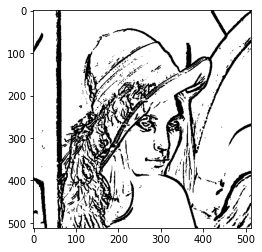

In [34]:
nb = Nevatia_Babu_Operator(img, 12500)
plt.imshow(nb.astype("uint8"), cmap ='gray')
plt.show()